Name: Wing Him (Kinen) Kao
Net ID: wk229

In [4]:
import numpy
import random
from matplotlib import pyplot
from matplotlib import colors
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import datetime
import cartopy.crs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from PIL import Image, ImageDraw
import pandas
from IPython.display import display

Research Question: To what extent is it possible to accurately forecast windspeeds at different locations of Hong Kong during tropical cyclone impacts through analysis of previous data?

Data Description: Raw Data Sources:
1. Hong Kong Observatory (HKO) Tropical Cyclone Reports
    - Maximum 1-hour sustained windspeeds
        - At all 32 stations during 76 of the tropical cyclones (TCs) between 2007-2020
    - Timing of highest windspeeds reached
        - At all 32 stations during 76 of the TCs between 2007-2020
    - Wind directions at timing of highest windspeeds reached
        - At all 32 stations during 76 of the TCs between 2007-2020
    - Link: https://www.hko.gov.hk/en/informtc/mangkhut18/tabwind.htm
        - And 76 other links with the same format
2. Hong Kong Observatory Tropical Cyclone Publications
    - Maximum 1-hour sustained windspeeds
        - At all 32 stations during 26 of the TCs between 2001-2006
    - Timing of highest windspeeds
        - At all 32 stations during 26 of the TCs between 2001-2006
    - Wind directions at time of highest windspeeds at 32 stations
        - At all 32 stations during 26 of the TCs between 2001-2006
    - Maximum 10-minute sustained windspeeds
        - At 3 of the stations:
            - King's Park, Hong Kong International Airport, Waglan Island
        - During all 102 TCs between 2001-2020
    - Timing, intensity, distance and bearing from Hong Kong (HK) at closest point of approach (CPA)
        - Of all 102 TCs between 2001-2020
    - Longitude, latitude and intensity at 6-hour time intervals
        - Of all 102 TCs between 2001-2020
    - Link: https://www.hko.gov.hk/en/publica/tc/files/TC2006.pdf
        - And 19 other links with the same format
3. Hong Kong Observatory Tropical Cyclone Warning Signals Database
    - Highest tropical cyclone signal issued by HKO
        - During all 102 TCs between 2001-2020
    - Link: https://www.hko.gov.hk/en/wxinfo/climat/warndb/warndb1.shtml
        - Set start year month as 200101 and end year month as 202010
4. Wikipedia Page of Strong Wind Signal No. 3
    - Maximum 10-minute sustained windspeeds
        - At 8 of the stations: 
            - Cheung Chau, HK Airport, Sai Kung, Kai Tak, Tsing Yi Shell Oil Depot, Lau Fa Shan, Sha Tin, Ta Kwu Ling
        - During 54 of the TCs that caused HKO to issue Strong Wind Signal No.3 or above between 2007-2020
    - Link: https://zh.wikipedia.org/wiki/三號強風信號
        - Only available in Chinese Wikipedia
5. Joint Typhoon Warning Center (JTWC) Northwest Pacific Ocean Best Track Data
    - Radius of maximum winds (R_max) at 6-hour time intervals
        - Of all 102 TCs between 2001-2020
        - A variable used as a measure of the size of TCs
    - Link: https://www.metoc.navy.mil/jtwc/jtwc.html?western-pacific
        - Containing 19 folders for use
        - 102 separate txt files for use for each TC

Data Description: Raw Data Sets:
1. 102 csv files of max 1-hour sustained windspeeds, timing and wind directions at 32 stations during all 102 TCs
    - Rows: Each windspeed station
    - Columns: Each categories of data
        - Maximum 1-hour sustained windspeeds
        - Timing of highest windspeeds reached
        - Wind directions at timing of highest windspeeds reached
    - 1 separate csv file for each of the 102 tropical cyclones
    - Either copy table from HKO Tropical Cyclone Reports into csv file
        - Table available in webpage format, instead of excel format
        - Manual work needed to fix formatting and edit out irregularities in the csv file
    - Or manually enter values found from HKO Tropical Cyclone Publications into csv file
        - Unable to copy table from a PDF file
        - Manual work needed to enter all values from the PDF file into the csv file
    - File Names: TC Code_TC Name.csv
        - e.g. 1822_Mangkhut, 1713_Hato, 1208_Vicente, etc.
2. 1 csv file of max 10-min sustained windspeeds at 10 of the stations during 54 of the TCs
    - Rows: Each tropical cyclone
    - Columns: Each windspeed station
    - Firstly copy table from Wikipedia page of Strong Wind Signal No. 3 containing 8 refernce windspeed stations
        - Cheung Chau, HK Airport, Sai Kung, Kai Tak, Tsing Yi Shell Oil Depot, Lau Fa Shan, Sha Tin, Ta Kwu Ling
        - Only data of 54 of the TCs that caused Strong Wind Signal No.3 or above from 2007 onward available
    - Then manually enter values of 2 other windspeed stations found from HKO Tropical Cyclone Publications
        - King's Park, Waglan Island
        - Hong Kong International Airport values already entered from the Wikipedia page
        - Unable to copy table from a PDF file
        - Manual work needed to enter values from the PDF file into the csv file
    - File Name: Ten_Min_Windspeed_Data.csv
3. 1 csv file of highest TC signal, distance and bearing from HK, intensity, radius of max winds, timing at CPA of TC
    - Rows: Each tropical cyclone
    - Columns: Each categories of data
        - Highest TC signal issued
        - Distance from Hong Kong (HK) at closest point of approach (CPA) or point of highest winds
        - Bearing from HK at CPA or point of highest winds
        - Intensity of TC at CPA or point of highest winds
        - Radius of maximum winds (R_max) of TC at CPA or point of highest winds
        - Timing of CPA or point of highest winds
    - Highest TC signal issued by HKO manually entered from HKO Tropical Cyclone Warning Signals Database
        - Formatting within that webpage unsuitable for copying entire table
        - Manual work needed to enter values from the table into the csv file
    - Timing, intensity, distance and bearing from Hong Kong (HK) at closest point of approach (CPA)
        - Unable to copy table from a PDF file
        - Manual work needed to enter values from the PDF file into the csv file
    - Timing, intensity, distance and bearing from Hong Kong (HK) at point of highest windspeeds in Hong Kong
        - Replace data at CPA with data at point of highest winds if its timing significantly differs from CPA timing
            - Significantly differs defined as more than 6 hours apart normally
            - Or more than 3 hours apart if CPA distance is less than 100km from Hong Kong
            - Eliminate scenario of CPA data not representative of conditions during TC's highest impact to Hong Kong
                - e.g. Tropical cyclone almost at dissipation by the point it reaches Hong Kong's CPA
                    - In these cases, winds will be very weak by the point it reaches Hong Kong's CPA
                    - Maximum winds occur well before the TC reaches Hong Kong's CPA when it was still intense
            - Timing of highest windspeeds obtained by averaging all timings of highest windspeeds at each station
            - Use another Python program to calculate distance and bearing from HK using longitude and latitude
        - Unable to copy table from a PDF file
        - Manual work needed to enter values from the PDF file into the csv file
    - Radius of maximum winds (R_max) at closest point of approach or point of highest windspeeds in Hong Kong
        - If TC's CPA distance outside of HKO's 256km radar range:
            - Use radius of maximum winds data provided by JTWC
                - Manual work needed to enter values from the various separate txt files from JTWC into the csv file
        - If TC's CPA distance within HKO's 256km radar range:
            - Use radar image of TC to manually measure the radius of maximum winds
                - Using radar image provides a more accurate estimate of the R_max than JTWC's estimate
                    - JTWC's R_max estimate solely based on its models rather than actual data
                    - Therefore actual data obtained through radar images provides a better estimate
                - Measure the distance between the center of the TC with the most intense rainband near its center
                    - Most intense rainband near its center in the direction of Hong Kong
                    - Measure manually using ruler
    - File Name: Typhoon_CPA_Data.csv
        - Note that "typhoon" and "tropical cyclone (TC)" are used interchangeably in this project
            - "Tropical cyclone (TC)" is a more formal term that includes TCs of all intensities
            - "Typhoon" by definition is a TC with intensity above 118km/h (same as "hurricane")
                - But similar to "hurricane", "typhoon" is often colloquially used to mean the same thing as "TC"

Data Cleaning Process Part 1:
- Purpose: Organizing 1-hour sustained windspeeds data
    - Organize all 102 csv files containing 1-hour sustained windspeeds data into one single file
    - Input: 102 csv files containing 1-hour sustained windspeeds for each tropical cyclone
        - File Names: TC Code_TC Name.csv
            - e.g. 1822_Mangkhut, 1713_Hato, 1208_Vicente, etc.
    - Output: One single file containing all the 1-hour sustained windspeeds
        - File Name: One_Hour_Windspeed_Data_Output.csv
    - Output: One single file containing all the wind directions counts
        - File Name: Wind_Direction_Data_Output.csv
    - Jupyter File Name: One_Hour_Windspeed_Data.ipynb
        - Can be found in Github repository
- Process:
    1. Open csv file of each tropical cyclone using pandas.read.csv
    2. Convert data inside dataframe into lists
        - Windspeed station names, 1-hour sustained windspeeds, wind directions, timing of highest windspeed
    3. Append each windspeed data into a 2D list combining every tropical cyclone's data
        - Matching windspeed station names with a predefined list of available windspeed stations
            - Append if windspeed station names match up
        - Append numpy.nan for windspeed stations that have missing data
    4. Find average of all timings of highest windspeeds at each station
        - Check whether this timing significant differs from the timing of the closest point of approach
            - Significantly differs defined as more than 6 hours apart normally
            - Or more than 3 hours apart if CPA distance is less than 100km from Hong Kong
            - If yes, replace the intensity, distance and bearing from Hong Kong at CPA
            - Replace with those variables at the point of highest windspeeds
            - Use another Python program to calculate distance and bearing from HK using longitude and latitude
                - Jupyter File Name: Distance_Bearing_Calculator.ipynb
    5. Repeat this process for all 102 csv files containing data for all 102 tropical cyclones
        - Copy and paste the same three cells of code 101 times
        - Replacing the names of input files and lists to the next tropical cyclone
        - Check for inconsistencies between each of the csv files
    6. Output 1-hour sustained windspeeds data into a new csv file
        - Rows: Each of the 102 tropical cyclones
        - Columns: Each of the 32 windspeed stations
    7. Count number of times each wind direction occur during each tropical cyclone
        - 16 possible wind directions: N, NNE, NE, ENE, E, ESE, SE, SSE, S, SSW, SW, WSW, W, WNW, NW, NNW
    8. Output wind directions count for each quadrant into another new csv file
        - Rows: Each of the 102 tropical cyclones
        - Columns: Each of the 16 wind direction

Data Cleaning Process Part 2:
- Purpose: Converting the 1-hour sustained windspeeds data into 10-minute sustained windspeeds data
    - Though most of the available data are expressed in 1-hour sustained windspeeds
    - But Hong Kong Observatory use 10-minute sustained windspeeds for issuing tropical cyclone warning purposes
    - Therefore need to convert 1-hour sustained windspeeds data into 10-minute sustained windspeeds data
        - In order to make this research valuable for actual tropical cyclone warning purposes
    - Input: 1-hour sustained windspeeds output from previous part
        - File Name: One_Hour_Windspeed_Data_Output.csv
    - Input: 10-minute sustained windspeeds of 54 of the tropical cyclones at 10 of the stations
        - File Name: Ten_Min_Windspeed_Data.csv
    - Output: 10-minute sustained windspeeds of all 102 tropical cyclones at all 32 stations
        - File Name: Ten_Min_Windspeed_Data_Output.csv
    - Jupyter File Name: Ten_Min_Windspeed_Data.ipynb
        - Can be found in Github repository
- Process:
    1. Open csv files using pandas.read.csv
    2. Convert data within 10-minute sustained windspeeds file into 2D array
        - Append numpy.nan for windspeed stations that have missing data
    3. Input data within 1-hour sustained windspeeds file for stations and TCs that have 10-minute data into 2D array
        - Matching windspeed station names and tropical cyclone codes to find data at the same station and same TC
            - 10 sub-arrays for each windspeed station
            - Each with 54 datapoints for each available TC
        - Append numpy.nan for windspeed stations that have missing data
    4. Divide the 10-minute sustained winds by the 1-hour sustained winds to find 10-min to 1-hour conversion factor
        - Find conversion factor for each datapoint of tropical cyclone and windspeed station with 10-min winds data
        - Conversion factor must be >= 1 by definition
            - Averaging windspeeds over a shorter time period by definition will obtain a higher/equal max windspeed
                - e.g: Windspeeds every 5 minutes: 58, 66, 72, 78, 83, 81, 84, 88, 89, 85, 80, 75
                - Max 1-hour sustained windspeed: (58+66+72+78+83+81+84+88+89+85+80+75)x5 / 60 = 78.25km/h
                - Max 10-minute sustianed windspeed: (88+89)x5 / 10 = 88.5km/h
                - Conversion factor in this case: 88.5 / 78.25 = 1.1308
    5. Find average conversion factor for each of the 10 windspeed stations
        - Average the conversion factor between all tropical cyclones for each of the 10 windpseed stations
        - I noticed a pattern that windspeed stations with higher average windspeeds have a lower conversion factor
        - I might be able to find a relationship between them, and use it to find conversion factors for each station
    6. Calculate windspeed ratio between each windspeed station and Cheung Chau
        - Simply averaging windspeeds will lead to significant biases because of frequent missing data
            - If data for tropical cyclones with high windspeeds is missing for a station
            - The average windspeed will have a significant low bias
                - e.g: Station A has windspeeds 38, 32, 80, 58, 156; Station B has windspeeds 36, 35, 78, 59, nan
                - Station A average windspeed: 72.8km/h, Station B average windspeed: 52.0km/h
                - Despite both stations have same average windspeed for first four TCs
                - Station B have much lower average windspeed overall due to missing data for last TC
        - To solve this problem, I use Cheung Chau, a station with no missing data, as a standard for comparison
        - Divide windspeeds at each station by windspeed at Cheung Chau (CC) for each specific TC
        - And then average windspeed ratios between all TCs for each station
        - This windspeed ratio is essentially a measure of the average windspeeed of each station with respect to CC
    7. Plot 10-min to 1-hour sustained winds conversion factor against windspeed ratio to Cheung Chau
        - See Graph 1 below
        - Plotted for the 10 stations with conversion factor data
        - Clearly negatively linear proportional
        - Correlation Coefficient: -0.978
            - Extremely strong relationship
        - Trendline formula: y = -0.178x + 1.34
            - Slope and y-Intercept obtained using numpy.polyfit
    8. Use trendline and windspeed ratios to Cheung Chau to find conversion factors for all windspeed stations
        - Substitute each station's windspeed ratio to Cheung Chau into x of the trendline above
        - Calculate conversion factor from 1-hour to 10-min sustained winds for all 32 windspeed stations
    9. Use conversion factors to calculate 10-minute sustained windspeeds for all remaining windspeed station and TC
        - Create 2D array with dimensions containing all windspeed stations and all TCs
        - First input data with already existing 10-minute sustained windspeeds
        - For remaining datapoints, mutiply 1-hour sustained windspeed data by the conversion factor for that station
        - Obtaining 10-minute sustained windspeeds for all windspeed stations and all TCs
    10. Output 10-minute sustained windspeeds data into a new csv file
        - Rows: Each of the 102 tropical cyclones
        - Columns: Each of the 32 windspeed stations

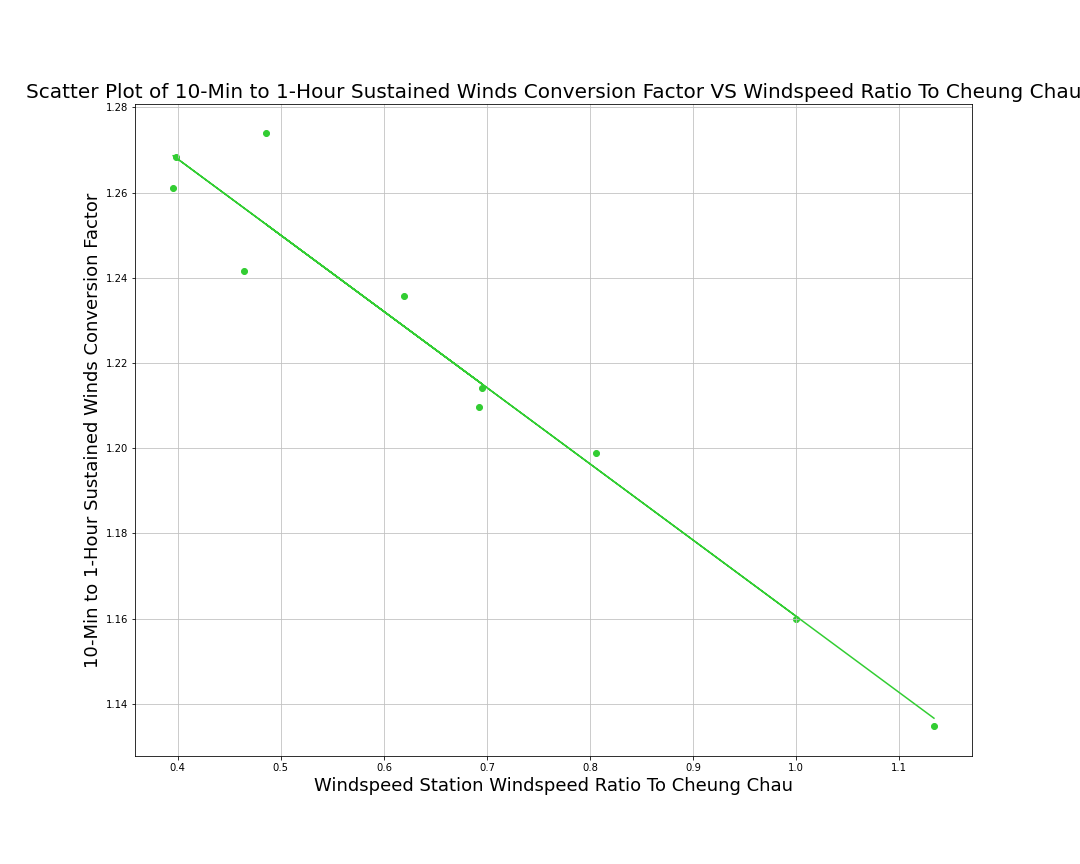

In [30]:
# Graph 1: Scatter Plot of 10-Min to 1-Hour Sustained Winds Conversion Factor VS Windspeed Ratio to Cheung Chau
Conversion_Factor_VS_Windspeed_Ratio_CC = Image.open("Conversion_Factor_VS_Windspeed_Ratio_CC.png")
display(Conversion_Factor_VS_Windspeed_Ratio_CC)

Data Cleaning Process Part 3:
- Purpose: Calculate windspeed ratios of each windspeed station to an average of all stations in Hong Kong
    - These windspeed ratios will be used in the exploratory data analysis part
        - Will be used to account for the significant differences in geographical surroundings between each station
        - Make data between different windspeed stations comparable with each other
    - Input: 10-minute sustained windspeeds output from previous part
        - File Name: Ten_Min_Windspeed_Data_Output.csv
    - Input: Variables of tropical cyclone at closest point of approach (CPA)
        - File Name: Typhoon_CPA_Data.csv
    - Output: Windspeed ratios of each of the 32 stations to an average of all stations in Hong Kong for each Quadrant
        - File Name: Windspeed_Ratio_To_HK_Average_Output.csv
    - Jupyter File Name: Windspeed_Data_Processing.ipynb
        - Can be found in Github repository
- Process:
    1. Open csv files using pandas.read.csv
    2. Delete windspeed stations that do not have enough data points to calculate a windspeed ratio
        - Count number of non-nan values for each windspeed station
        - Criteria: At least 30 data points out of 102 required for each windspeed station
        - If number of non-nan values < 30, delete that windspeed station from dataframe
            - Lamma Island (6 data points) and Tap Mun East (18 data points) deleted
        - 30 windspeed stations remaining
    3. Convert data within 10-minute sustained windspeeds file into 2D array
        - Append numpy.nan for windspeed stations that have missing data
    4. Convert data within typhoon CPA data file into arrays or lists according to each variable
        - Arrays for highest TC signal issued, CPA distance from Hong Kong, CPA intensity and CPA radius of max winds
        - Lists for typhoon name, typhoon code and CPA bearing from Hong Kong
    5. Separate tropical cyclones according to its CPA bearing quadrant
        - Create new 3D list to store windspeeds according to CPA bearing quadrant of the TC
            - If TC's CPA bearing == NE, ENE, E or ESE:
                - Belongs to eastern quadrant of Hong Kong
                - Append its windspeed data to 0th sub-list
            - If TC's CPA bearing == SE, ESE, S or SSW:
                - Belongs to southern quadrant of Hong Kong
                - Append its windspeed data to 1st sub-list
            - If TC's CPA bearing == SW, WSW, W or WNW:
                - Belongs to western quadrant of Hong Kong
                - Append its windspeed data to 2nd sub-list
            - If TC's CPA bearing == NW, NNW, N or NNE:
                - Belongs to northern quadrant of Hong Kong
                - Append its windspeed data to 3rd sub-list
            - If TC's CPA bearing == N/A:
                - Ignore the TCs which made landfall within Hong Kong
        - Since wind direction is heavily dependent on CPA bearing quadrant of the TC as shown later
        - Separating tropical cyclones by its CPA quadrant can account for differences in geoegraphy of each station
            - Differences in geographical surroundings that affect vulnerability to different wind directiions
    6. Calculate windspeed ratio between each windspeed station and Cheung Chau for each quadrant separately
        - Again using Cheung Chau, a station with no missing data, as a standard for comparison
        - Divide windspeeds at each station by windspeed at Cheung Chau (CC) for each specific TC 
        - And then average windspeed ratios between the TCs within the same quadrant for each station
        - This is essentially a measure of the average windspeeed of each station for typhoons at each quadrant
    7. Calculate the average of these average windspeed ratios to Cheung Chau for each quadrant
        - Essentially obtaining an average windspeed over all stations of HK in relation to CC for each quadrant
            - e.g. For E quadrant, the average windspeed over all HK stations is 0.805718 times that of Cheung Chau
    8. Calculate windspeed ratio between each windspeed station and average of HK for each quadrant separately
        - Divide the windspeed ratios between each station and CC by the windspeed ratio between HK average to CC
        - The windspeed ratio to CC part cancels out each other
        - Leaving a windspeed ratio between each windspeed station and average of HK for each quadrant
    10. Output 10-minute sustained windspeeds data into a new csv file
        - Rows: Each of the 4 quadrants
        - Columns: Each of the 30 available windspeed stations with enough data

Exploratory Data Analysis Part 1:
- Purpose: Find trends within the data set and provide potential directions for later phases of the project
    - Input: 10-minute sustained windspeeds output from previous part
        - File Name: Ten_Min_Windspeed_Data_Output.csv
    - Input: Wind directions counts during each tropical cyclone
        - File Name: Wind_Direction_Data_Output.csv
    - Input: Variables of tropical cyclone at closest point of approach (CPA)
        - File Name: Typhoon_CPA_Data.csv
    - Input: Windspeed ratios of each of the 32 stations to an average of all stations in Hong Kong for each Quadrant
        - File Name: Windspeed_Ratio_To_HK_Average_Output.csv
    - Jupyter File Name: Exploratory_Data_Analysis.ipynb
        - Can be found in Github repository
- Process:
    1. Open csv files using pandas.read.csv
    2. Convert data within 10-minute sustained windspeeds file into 2D array
        - Append numpy.nan for windspeed stations that have missing data
    3. Convert data within typhoon CPA data file into arrays or lists according to each variable
        - Arrays for highest TC signal issued, CPA distance from Hong Kong, CPA intensity and CPA radius of max winds
        - Lists for typhoon name, typhoon code and CPA bearing from Hong Kong
    4. Separate tropical cyclones according to its CPA bearing quadrant
        - Create new 3D list to store windspeeds according to CPA bearing quadrant of the TC
        - Create new 2D lists to store each CPA variable according to CPA bearing quadrant of the TC
            - If TC's CPA bearing == NE, ENE, E or ESE:
                - Belongs to eastern quadrant of Hong Kong
                - Append its windspeed data to 0th sub-list
            - If TC's CPA bearing == SE, ESE, S or SSW:
                - Belongs to southern quadrant of Hong Kong
                - Append its windspeed data to 1st sub-list
            - If TC's CPA bearing == SW, WSW, W or WNW:
                - Belongs to western quadrant of Hong Kong
                - Append its windspeed data to 2nd sub-list
            - If TC's CPA bearing == NW, NNW, N or NNE:
                - Belongs to northern quadrant of Hong Kong
                - Append its windspeed data to 3rd sub-list
            - If TC's CPA bearing == N/A:
                - Ignore the TCs which made landfall within Hong Kong
    5. Calculate proportion of each wind direction during typhoons located at each quadrant
        - Divide the count of each wind direction by the total number of data during typhoons at each quadrant
    6. Plot histogram of proportion of each wind direction during typhoons at each quadrant
        - See Graph 2 below
        - x Axis: Wind direction
            - 16 possible wind directions: N, NNE, NE, ENE, E, ESE, SE, SSE, S, SSW, SW, WSW, W, WNW, NW, NNW
        - y Axis: Proportion
        - Typhoons located at eastern quadrant:
            - Wind directions very scattered, no obvious dominant wind direction
            - N wind most likely at 16.8%
            - W, WNW, NNW, NNE, E all between 8-10%
        - Typhoons located at southern quadrant:
            - Wind directions concentrated between N to SE
            - E wind most dominant at 47.7%
            - ENE wind 15.5%, ESE wind 12.6%
        - Typhoons located at western quadrant:
            - Wind directions concentrated between NE to S
            - E wind also most dominant at 38.4%
            - ESE wind 21.8%, SE 15.7%
        - Typhoons located at northern quadrant:
            - Wind directions quite scattered, generally concentrated between SSE and N
            - W wind most likely at 20.8%
            - WNW 15.3%, SW 10.6%, SSW 10.1%
        - The wind direction is likely strongly correlated with the typhoon's quadrant bearing
            - The histogram can clearly demonstrate the relationship despite the lack of quantitative analysis
            - The dominant wind direction is generally around 90 degrees counterclockwise of the typhoon's quadrant
                - Exception being western quadrant, which is closer to 180 degrees from the typhoon's quadrant

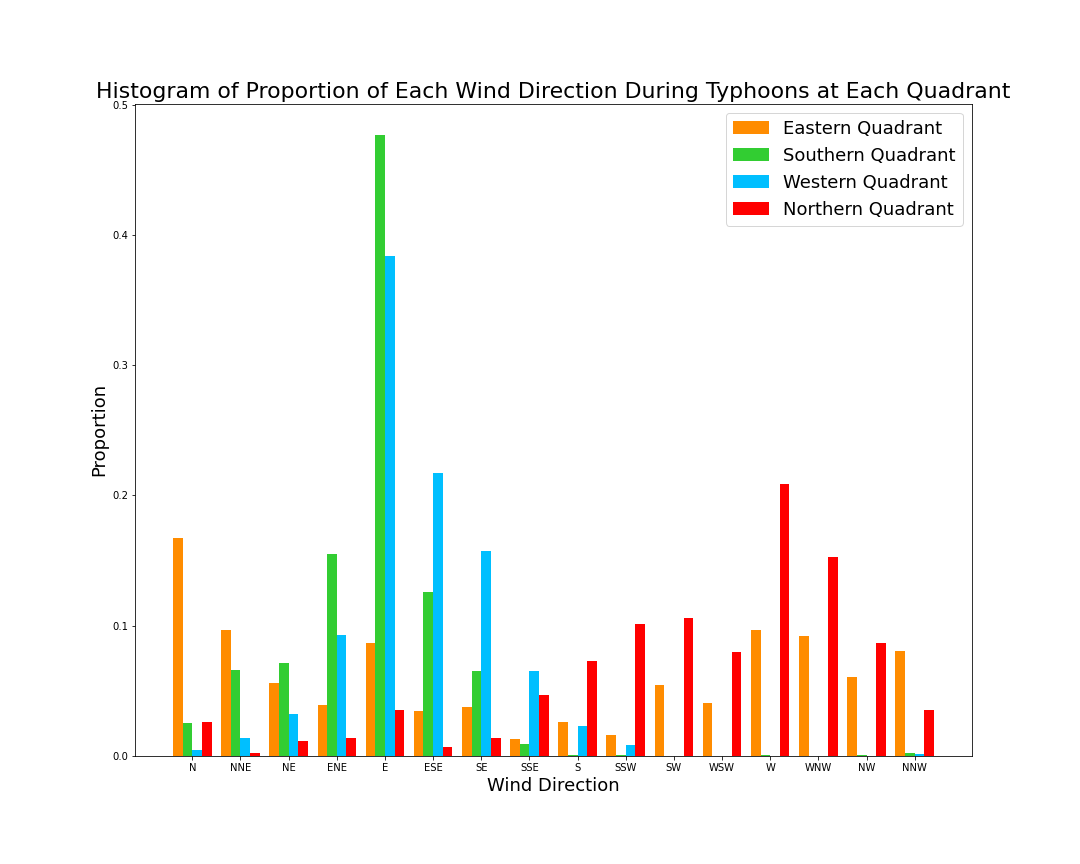

In [31]:
# Graph 2: Histogram of Proportion of Each Wind Direction During Typhoons at Each Quadrant
Wind_Direction_Proportion_Quadrants_Histogram = Image.open("Wind_Direction_Proportion_Quadrants_Histogram.png")
display(Wind_Direction_Proportion_Quadrants_Histogram)

Exploratory Data Analysis Part 2:
- Process:
    7. Plot histogram of windspeeds at all stations during typhoons at each quadrant
        - See Graph 3 below
        - x Axis: 10-minute sustained windspeeds (km/h)
        - y Axis: Count
        - Mode for all 4 quadrants are between 20-40km/h
        - More typhoons at southern quadrant and western quadrant for higher windspeeds
            - Maximum windspeed recorded for southern and western quadrant above 160km/h
        - More typhoons at eastern qudrant and northern quadrant for lower windspeeds
        - Typhoons at southern quadrant and western quadrant are more likely to bring stronger winds
            - Supports the meteorological theory
                - Typhoons at southern quadrant and western quadrant generally have their right semicircle near HK
                    - Right semicircles of northern hemisphere typhoons produce stronger winds
                    - Because angular velocity of typhoon combines with its movement velocity
                - Typhoons at southern quadrant and western quadrant generally leads to eastern or southern winds
                    - As shown above with the histogram of proportion of each wind direction
                    - Eastern or southern winds blow from the sea onshore, with less friction
                    - Western or northern winds blow from the land, with more friction
        - Demonstrates the significant differences in windspeeds between typhoons located at different quadrants
            - Therefore have to separate the typhoons by their quadrants for this project

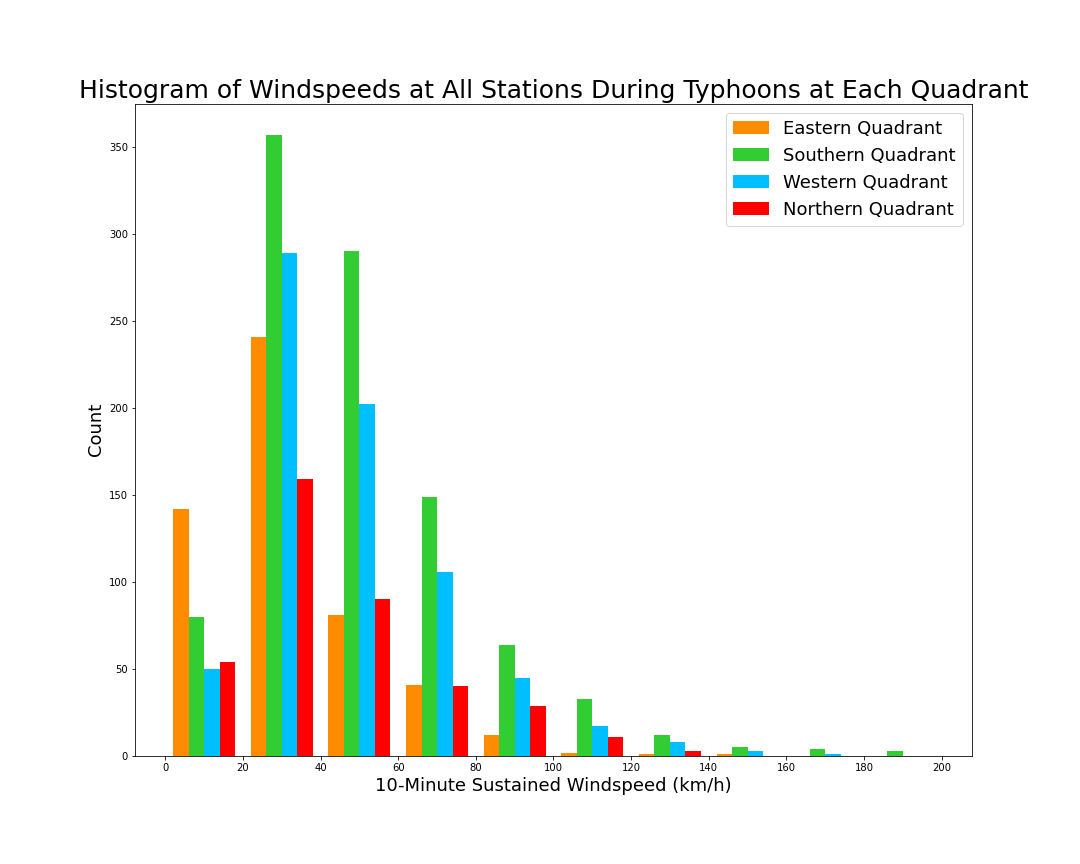

In [32]:
# Graph 3: Histogram of Windspeeds at All Stations During Typhoons at Each Quadrant
All_Windspeed_Quadrants_Histogram = Image.open("All_Windspeed_Quadrants_Histogram.png")
display(All_Windspeed_Quadrants_Histogram)

Exploratory Data Analysis Part 3:
- Process:
    8. Plot box plot of windspeeds at selected stations during typhoons at each quadrant
        - See Graph 4 below
        - x Axis: Windspeed Station
        - y Axis: 10-minute sustained windspeeds (km/h)
        - 6 stations chosen: Cheung Chau, HK Int. Airport, Sai Kung, Star Ferry (Kowloon), Lau Fau Shan, Sha Tin
            - Stations at different parts of Hong Kong with different levels of vulnerability to winds
            - Stations with no missing data
        - Cheung Chau has the highest median and upper quartile for almost all quadrants
            - Only with a lower median than HK International Airport and Lau Fau Shan during typhoons at E quadrant
            - Especially dominant during typhoons in southern quadrant and western quadrant
            - Cheung Chau located on an island far away from city center
            - Facing the sea to the east, south and west, very prone to all wind directions except for northern
                - Therefore winds less strong during typhoons at eastern quadrant that lead to northern winds
        - HK International Airport has the second highest median and upper quartile for most quadrants
            - Especially strong relative to Cheung Chau during typhoons in eastern and northern quadrant
                - Median higher than Cheung Chau for eastern quadrant, but upper quartile surprisingly low
            - HK International Airport also located on an island, facing the sea to the north and west
                - Therefore winds stronger during typhoons at eastern and northern quadrant that lead to N and W winds
        - Sai Kung and Star Ferry has much higher median and upper quartile than Lau Fau Shan for S and W quadrants
            - Sai Kung faces the sea to the east, with mountains in its west
                - Therefore very prone to eastern winds during typhoons at S and W quadrants
                - Much less prone to western winds during typhoons at N quadrant
            - Star Ferry (Kowloon) faces the sea to the south, with urban dense buildings in its north
                - Therefore much less prone to northern winds during typhoons at E quadrant
        - But Lau Fau Shan has much higher median and upper quartile than Sai Kung and Star Ferry for N quadrant
            - Lau Fau Shan faces the sea to the west and north, with mountains in its east and south
                - Therefore very prone to western winds and northern winds during typhoons at N and E quadrants
                - Much less prone to eastern winds and southern winds during typhoons at S and W quadrants
        - Sha Tin has the lowest median and upper quartile for all quadrants
            - Surrounded by dense buildings and mountains in every direction
                - Therefore not prone to any directions of winds
        - These results demonstrate that the windspeeds at different stations in Hong Kong vary massively
            - Very significantly affected by the surrounding environment between each station
            - Vulnerabilities to different wind directions significant differ based on direction of sea or mountains
                - Mostly clearly shown by the comparison between Sai Kung and Lau Fau Shan

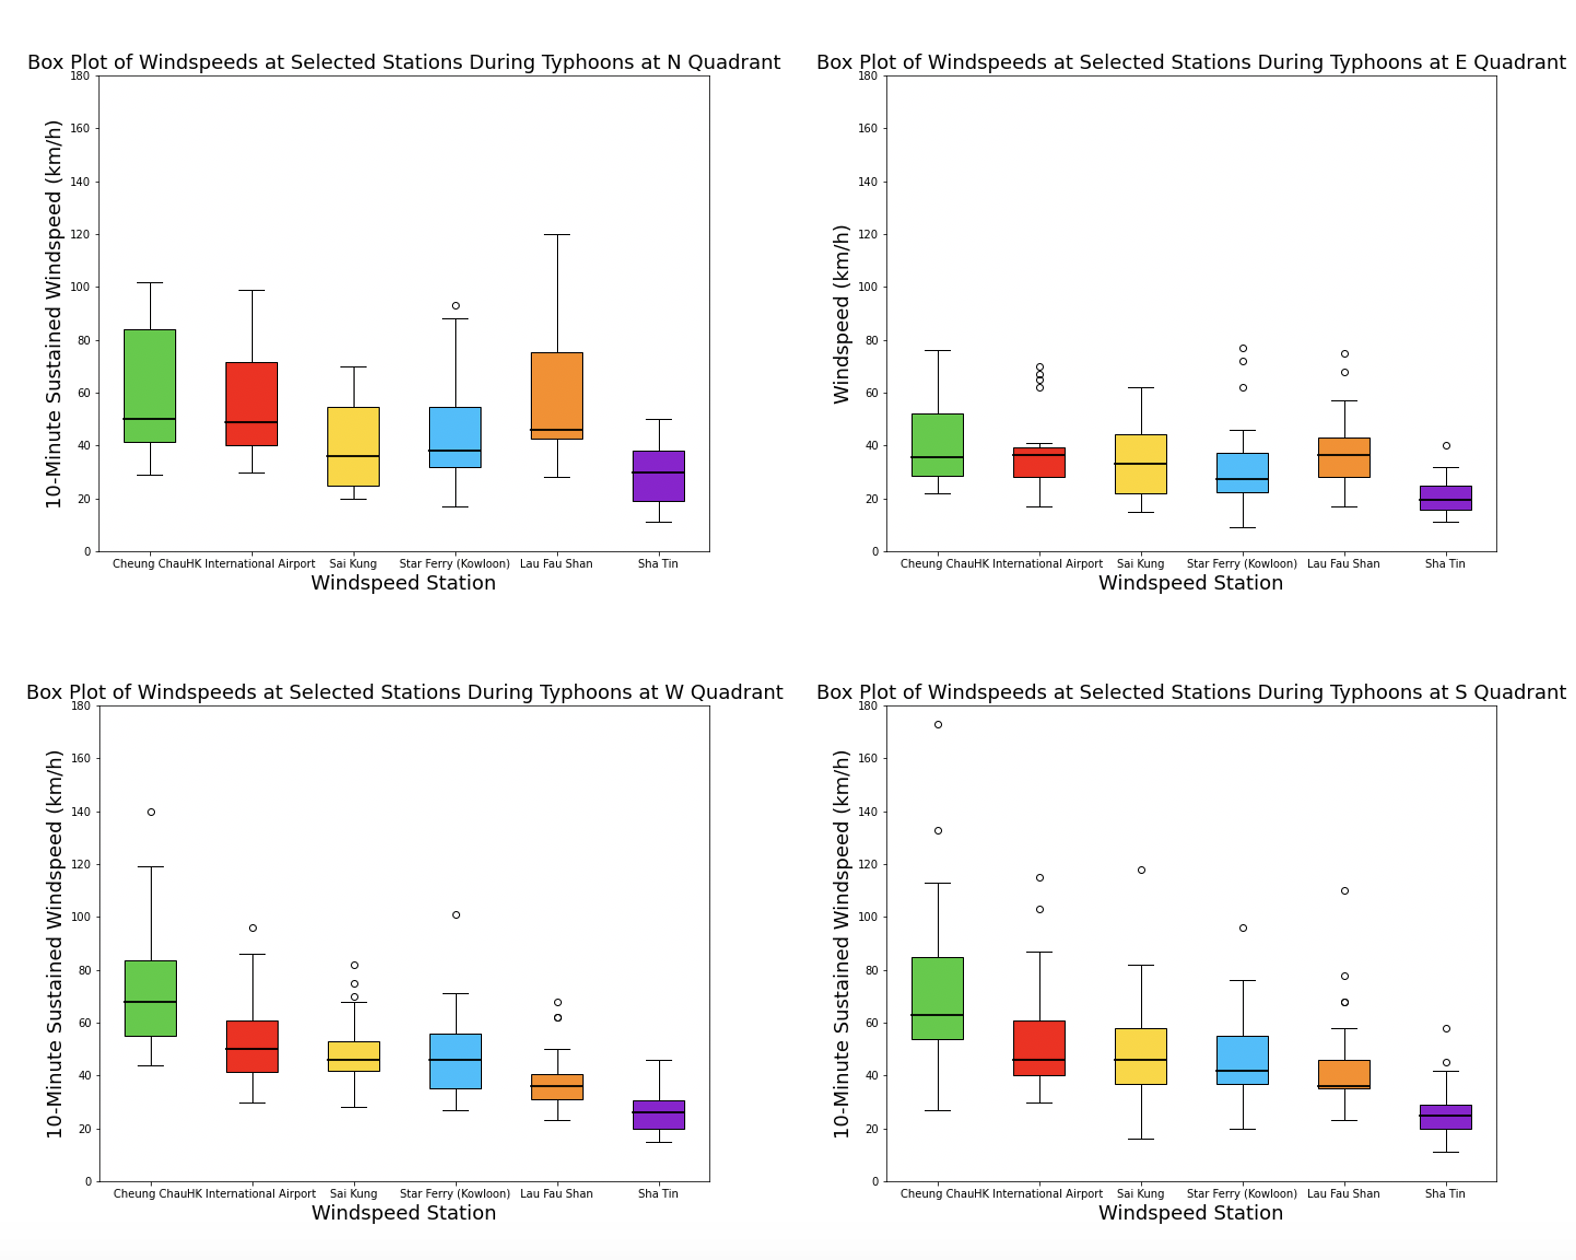

In [23]:
# Graph 4: Box Plot of Windspeeds at Selected Stations During Typhoons at Each Quadrant
Selected_Stations_Windspeed_Quadrants_Box_Plot = Image.open("Selected_Stations_Windspeed_Quadrants_Box_Plot.png")
display(Selected_Stations_Windspeed_Quadrants_Box_Plot)

Exploratory Data Analysis Part 4:
- Process:
    9. Plot scatter plot of windspeeds at all stations VS typhoon intensity
        - See Graph 5 below
        - x Axis (Independent Variable): Typhoon intensity at closest point of approach (km/h)
        - y Axis (Dependent Variable): 10-minute sustained windspeeds (km/h)
        - Correlation Coefficient: 0.358
            - Relatively weak relationship
        - Trendline formula: y = 0.238x + 21.8
            - Slope and y-Intercept obtained using numpy.polyfit
            - Positive slope
            - y-Intercept well above 0km/h
                - Doesn't support the meteorological theory that the y-intercept should be 0km/h
        - Seemingly positively linearly correlated, but quite weak correlation
            - An increase in typhoon intensity generally leads to an increase in windspeed
                - Supports the meteorological theory that stronger typhoons lead to higher winds
        - Windspeeds in Hong Kong is dependent on the typhoon intensity, but not the only important factor
            - Other factors such as distance from HK, radius of max winds and quadrant of typhoon also matters

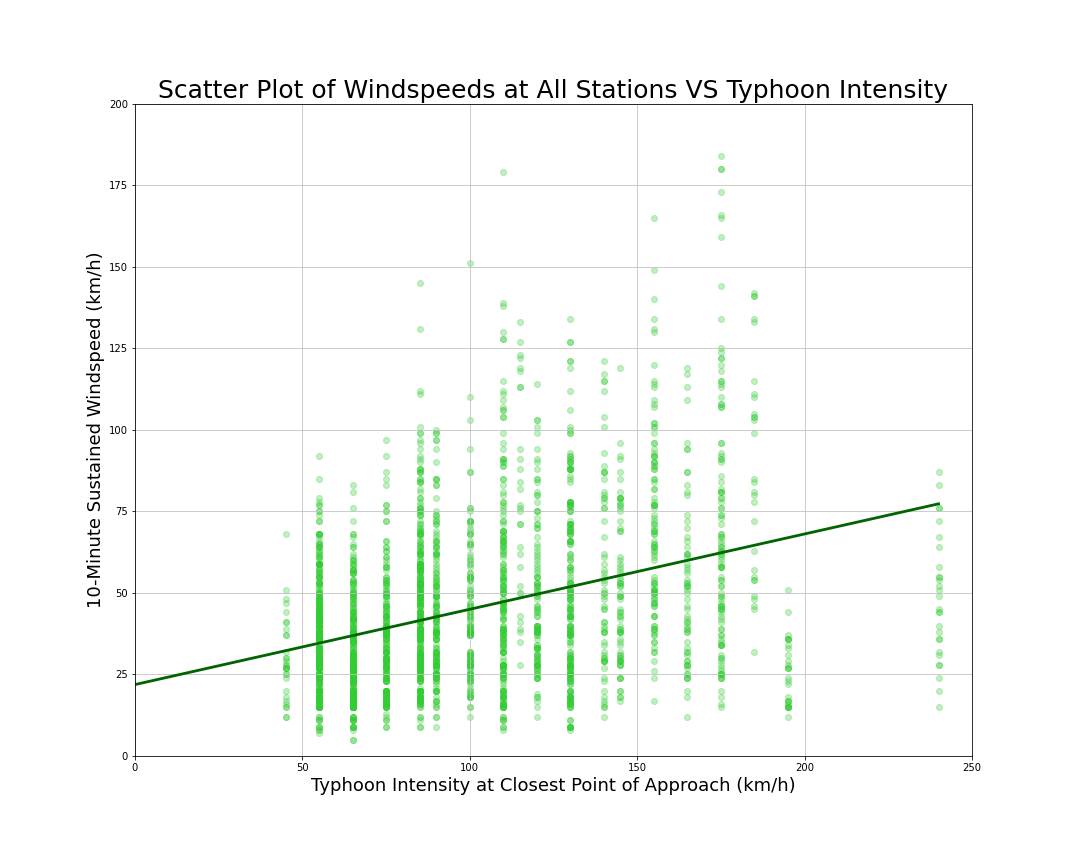

In [28]:
# Graph 5: Scatter Plot of Windspeeds at All Stations VS Typhoon Intensity
Windspeed_VS_Intensity_Scatter_Plot = Image.open("Windspeed_VS_Intensity_Scatter_Plot.png")
display(Windspeed_VS_Intensity_Scatter_Plot)

Exploratory Data Analysis Part 5:
- Process:
    10. Plot scatter plot of windspeeds at all stations VS typhoon distances from Hong Kong
        - See Graph 6 below
        - x Axis (Independent Variable): Distance between typhoon and Hong Kong at closest point of approach (km)
        - y Axis (Dependent Variable): 10-minute sustained windspeeds (km/h)
        - Correlation Coefficient: -0.343
            - Relatively weak relationship
            - Similar in magnitude to the correlation coefficient between windspeed and typhoon intensity
        - Trendline formula: y = -0.0518x + 60.0
            - Slope and y-Intercept obtained using numpy.polyfit
            - Negative slope
        - Seemingly negatively linearly correlated, but quite weak correlation
            - A decrease in typhoon distance from Hong Kong generally leads to an increase in windspeed
                - Supports the meteorological theory that closer typhoons lead to higher winds
        - Windspeeds in Hong Kong is dependent on the typhoon distance from HK, but not the only important factor
            - Other factors such as intensity, radius of max winds and quadrant of typhoon also matters

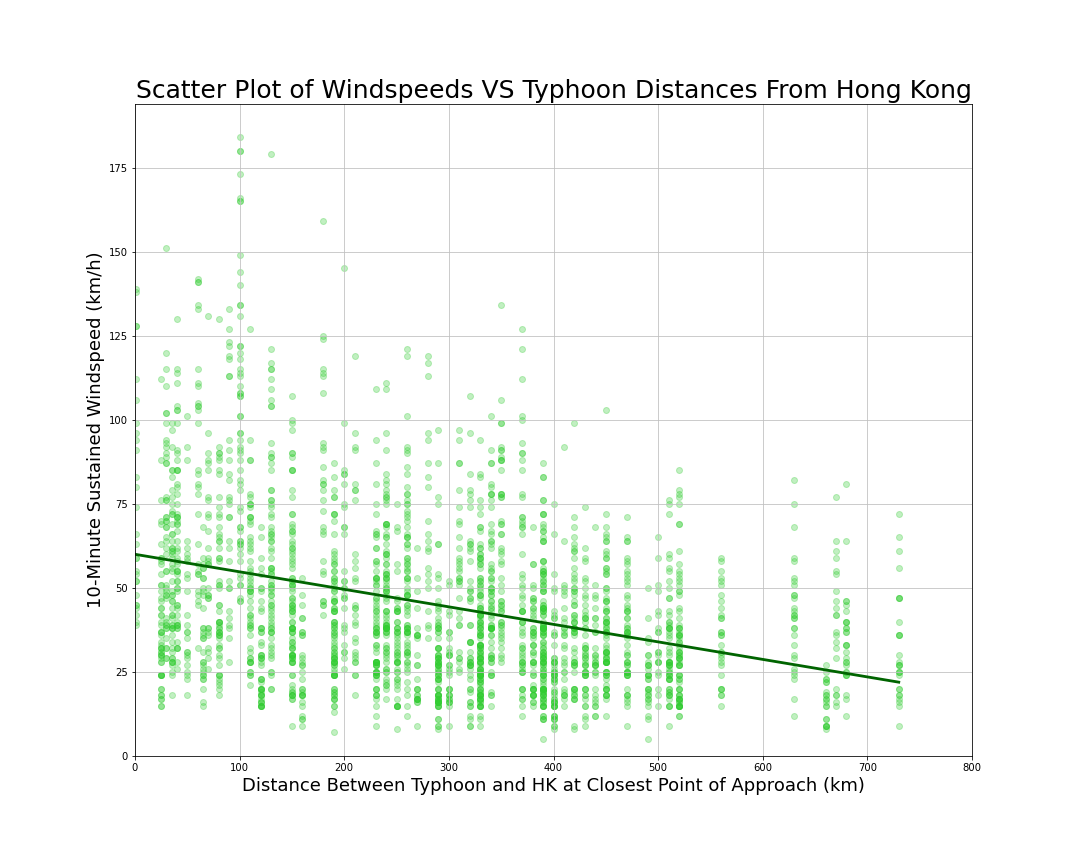

In [27]:
# Graph 6: Scatter Plot of Windspeeds VS Typhoon Distances From Hong Kong
Windspeed_VS_Distance_Scatter_Plot = Image.open("Windspeed_VS_Distance_Scatter_Plot.png")
display(Windspeed_VS_Distance_Scatter_Plot)

Exploratory Data Analysis Part 6:
- Process:
    11. Plot scatter plot of windspeeds at all stations VS typhoon distances from Hong Kong
        - See Graph 7 below
        - x Axis (Independent Variable): Radius of maximum winds at closest point of approach (km)
            - Radius of maximum winds as a measure of the size of the typhoon
        - y Axis (Dependent Variable): 10-minute sustained windspeeds (km/h)
        - Correlation Coefficient: -0.157
            - Very weak relationship
            - Much weaker in magnitude than between windspeed and intensity and between windspeed and distance from HK
        - Trendline formula: y = -0.108x + 51.8
            - Slope and y-Intercept obtained using numpy.polyfit
            - Negative slope
        - Might be negatively linearly correlated, but very weak correlation
            - An increase in radius of maximum winds (i.e. size) of typhoon seems to lead to a decrease in windspeed
                - Counterintuitive from the meteorological theory that larger typhoons lead to higher winds
                    - Reason for this might be because larger size typhoons in fact tend to be weaker TCs
                        - Weaker TCs are unable to organize their circulation well
                            - Leading to very large radius of maximum winds and chaotic structures
                        - Stronger TCs organize their circulation very wel
                            - Leading to smaller radius of maximum winds and organized structures
                    - The relationship between R_max and intensity overrides relationship between R_max and windspeeds
        - Windspeeds in Hong Kong should be dependent on the radius of max winds, but not the only important factor
            - Other factors such as intensity, distance from HK and quadrant of typhoon also matters
            - Need to combine all three factors along with the quadrant of typhoon to find a stronger relationship

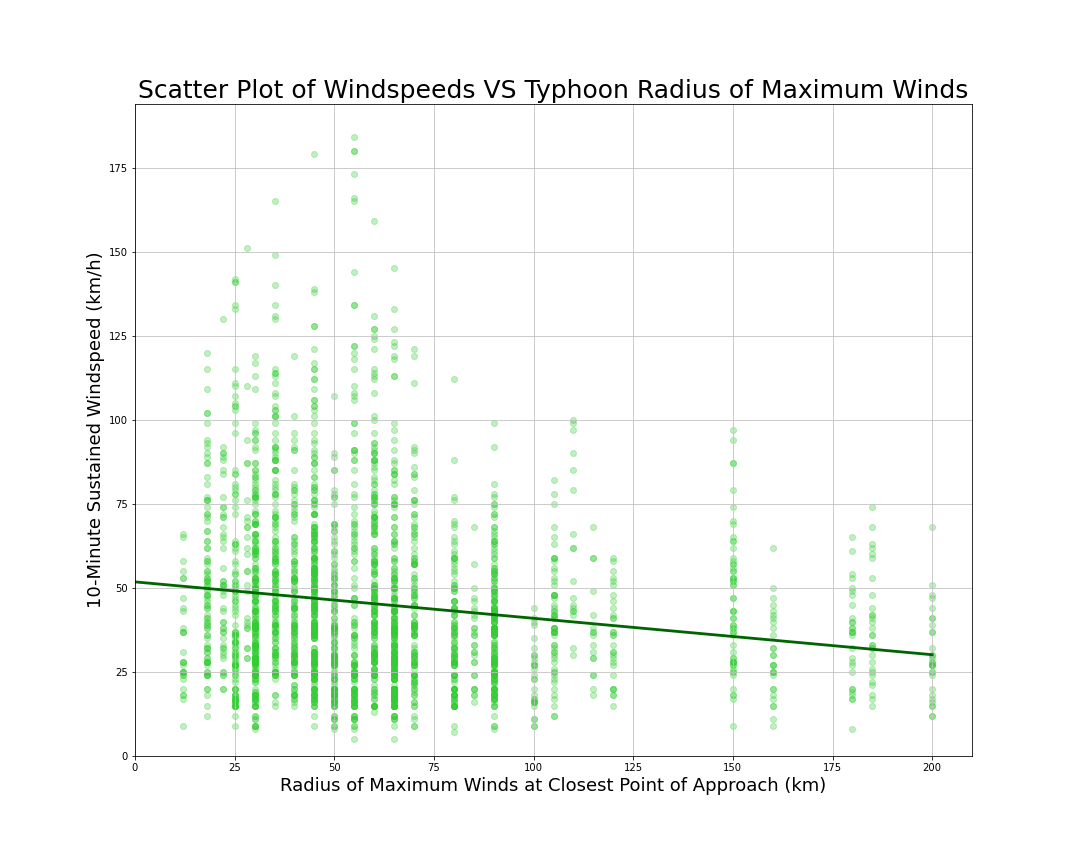

In [29]:
# Graph 7: Scatter Plot of Windspeeds VS Typhoon Radius of Maximum Winds
Windspeed_VS_R_Max_Scatter_Plot = Image.open("Windspeed_VS_R_Max_Scatter_Plot.png")
display(Windspeed_VS_R_Max_Scatter_Plot)

Exploratory Data Analysis Part 7:
- Process:
    12. Calculate theoretical windspeeds under Modified Rankine Vortex Model (Phadke et al.)
        - To combine the three factors typhoon intensity, distance from HK and radius of maximum winds
        - Formulas for calculating theoretical windspeeds can be used
        - According to a meteorology research paper, there are five formulas to calculate theoretical windspeeds
            - Development and Testing of Tropical Cyclone Parametric Wind Models Tailored for Midlatitude Application—Preliminary Results (MacAfee and Pearson)
                - Link: https://journals.ametsoc.org/jamc/article/45/9/1244/12737/Development-and-Testing-of-Tropical-Cyclone
            - Two of the five formulas are applicable to our projects
                - These two formulas make use of typhoon intensity, distance from HK and radius of maximum winds
                - The other three formulas are too complicated with too many variables unattainable for this project
        - First formula: Modified Rankine Vortex (MRV) Model by Phadke et al. (2003):
            - $V = V_{max} (\frac{R_{max}}{R})^B, R \geq R_{max} ;$
            - $V = V_{max} (\frac{R}{R_{max}})^B, R \lt R_{max} $
                - $V$: Windspeed at a given location
                - $V_{max}$: Intensity of the tropical cyclone
                - $R$: Distance between the tropical cyclone and the given location
                - $R_{max}$: Radius of maximum winds of the tropical cyclone
                - $B$: A "shape factor" set as 0.5 suggested by Phadke et al. (2003)
                    - Future investigations might involve adjusting this "shape factor" $B$
        - Use the intensity, distance from HK and R_max of each TC to calculate the theoretical windspeed at HK
            - Same theoretical windspeed for each TC across all windspeed stations
    13. Plot scatter plot of actual VS theoretical windspeeds by MRV model during typhoons located at each quadrant
        - See Graph 8 below
        - x Axis (Independent Variable): Theoretical windspeed by Modified Rankine Vortex Model (km/h)
        - y Axis (Dependent Variable): Actual windspeed at every station (km/h)
        - Different colours represent typhoons located at different quadrants
            - Orange: Eastern Quadrant
            - Green: Southern Quadrant
            - Blue: Western Quadrant
            - Red: Northern Quadrant
        - Correlation coefficients:
            - Eastern Quadrant: 0.597
            - Southern Quadrant: 0.621
            - Western Quadrant: 0.555
            - Northern Quadrant: 0.628
            - Average of All Quadrants: 0.600
            - Moderately strong relationship
        - Trendline formulas:
            - Eastern Quadrant: y = 0.561x + 7.24
            - Southern Quadrant: y = 0.684x + 16.46
            - Western Quadrant: y = 0.704x + 15.48
            - Northern Quadrant: y = 0.522x + 12.05
            - Average of All Quadrants: y = 0.618x + 12.81
            - All positive slopes and positive y-intercepts
            - Southern and western quadrants have higher slope and y-intercept than northern and eastern quadrants
                - Supports hypothesis based on previous observations on difference in windspeeds between quadrants
            - Slope well below 1
                - Rate of change of theoretical windspeeds much lower than actual windspeeds
            - y-Intercept well above 0km/h
                - Doesn't support the meteorological theory that the y-intercept should be 0km/h
        - More clearly positive linearly correlated, moderately strong correlation
            - Much higher correlation coef than intensity, distance from HK and radius of max winds individually
                - Combining these three factors together using this formula provides a significant improvement
            - But still not the optimal scenario
                - Too large vertical variation in actual windspeeds between different windspeed statiions
        - Simply putting all windspeeds from every station together without any adjustments is not good enough
            - Need to consider the impact of each windspeed station's surroundings on its windspeeds
                - Differences in geographical surroundings that affect vulnerability to different wind directiions

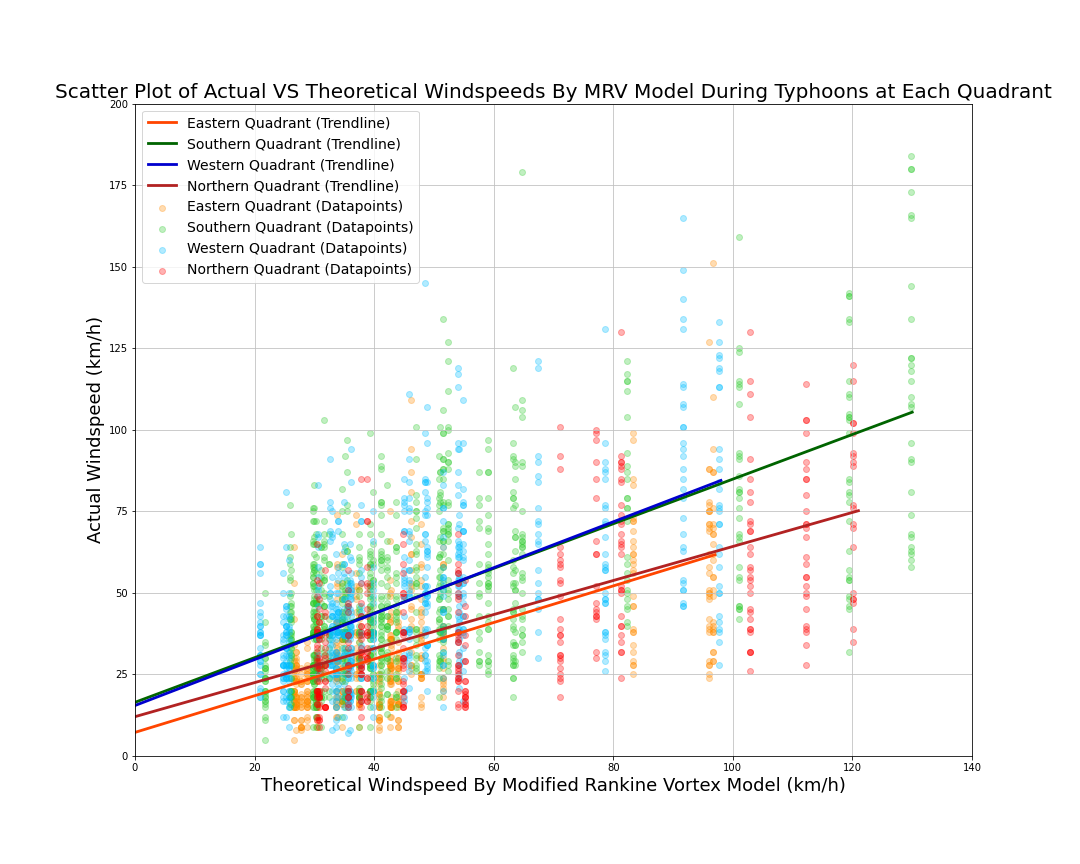

In [36]:
# Graph 8: Scatter Plot of Actual VS Theoretical Windspeeds By MRV Model During Typhoons at Each Quadrant
Actual_VS_MRV_Theoretical_Windspeed_Quadrants_Scatter_Plot = Image.open("Actual_VS_MRV_Theoretical_Windspeed_Quadrants_Scatter_Plot.png")
display(Actual_VS_MRV_Theoretical_Windspeed_Quadrants_Scatter_Plot)

Exploratory Data Analysis Part 8:
- Process:
    14. Calculate theoretical windspeeds under Modified Rankine Vortex Model with windspeed ratios to HK average
        - To consider for the differences in geographical surroundings between each windspeed station
        - Make use of the windspeed ratios between each station to an average of all HK stations calculated before
        - Mutliply the theoretical windspeed under MRV Model by the windspeed ratio for each of the stations
            - Now every data point with different station and different TC have a different theoretical windspeed
            - A theoretical windspeed catered to each station based on its vulnerability to typhoons in each quadrant
        - Modified Rankine Vortex (MRV) Model with windspeed ratios to HK average:
            - $V = k V_{max} (\frac{R_{max}}{R})^B, R \geq R_{max} ;$
            - $V = k V_{max} (\frac{R}{R_{max}})^B, R \lt R_{max} $
                - $k$: Windspeed ratio between the given location to average of the entire city
                - $V$: Windspeed at a given location
                - $V_{max}$: Intensity of the tropical cyclone
                - $R$: Distance between the tropical cyclone and the given location
                - $R_{max}$: Radius of maximum winds of the tropical cyclone
                - $B$: A "shape factor" set as 0.5 suggested by Phadke et al. (2003)
                    - Future investigations might involve adjusting this "shape factor" $B$
    15. Plot scatter plot of actual VS theoretical windspeeds by MRV model with windspeed ratios for each quadrant TC
        - See Graph 9 below
        - x Axis (Independent Variable): Theoretical windspeed by MRV Model with windspeed ratios to HK average (km/h)
        - y Axis (Dependent Variable): Actual windspeed at every station (km/h)
        - Different colours represent typhoons located at different quadrants
            - Orange: Eastern Quadrant
            - Green: Southern Quadrant
            - Blue: Western Quadrant
            - Red: Northern Quadrant
        - Correlation coefficients:
            - Eastern Quadrant: 0.853
            - Southern Quadrant: 0.916
            - Western Quadrant: 0.905
            - Northern Quadrant: 0.896
            - Average of All Quadrants: 0.892
            - Very strong relationship
        - Trendline formulas:
            - Eastern Quadrant: y = 0.630x + 4.20
            - Southern Quadrant: y = 0.805x + 11.45
            - Western Quadrant: y = 0.830x + 10.15
            - Northern Quadrant: y = 0.572x + 9.15
            - Average of All Quadrants: y = 0.709x + 8.73
            - All positive slopes and positive y-intercepts
            - Southern and western quadrants again higher slope and y-intercept than northern and eastern quadrants
                - Supports hypothesis based on previous observations on difference in windspeeds between quadrants
            - Slopes all higher than the previous case without using windspeed ratios, but still below 1
                - Rate of change of theoretical windspeeds getting closer to rate of change of actual windspeeds
                - Likely a more accurate representation than without using windspeed ratios
            - y-Intercept all closer to 0km/h than without using windspeed ratios, but still above 0km/h
                - Still doesn't totally support the meteorological theory that the y-intercept should be 0km/h
                - But definitely an improvement compared to without using windspeed ratios
        - Very clearly positive linearly correlated, very strong correlation
            - Average correlation coefficient increasing by almost 0.3
            - Very big improvement compared to the previous case without using windspeed ratios
                - Much clearer trend shown by the trendline of linearly increasing actual windspeeds
                - Much less vertical variation in actual windspeeds as theoretical windspeeds become more spread out
                - Much less chance of outliers when considering the differences in vulnerability between stations

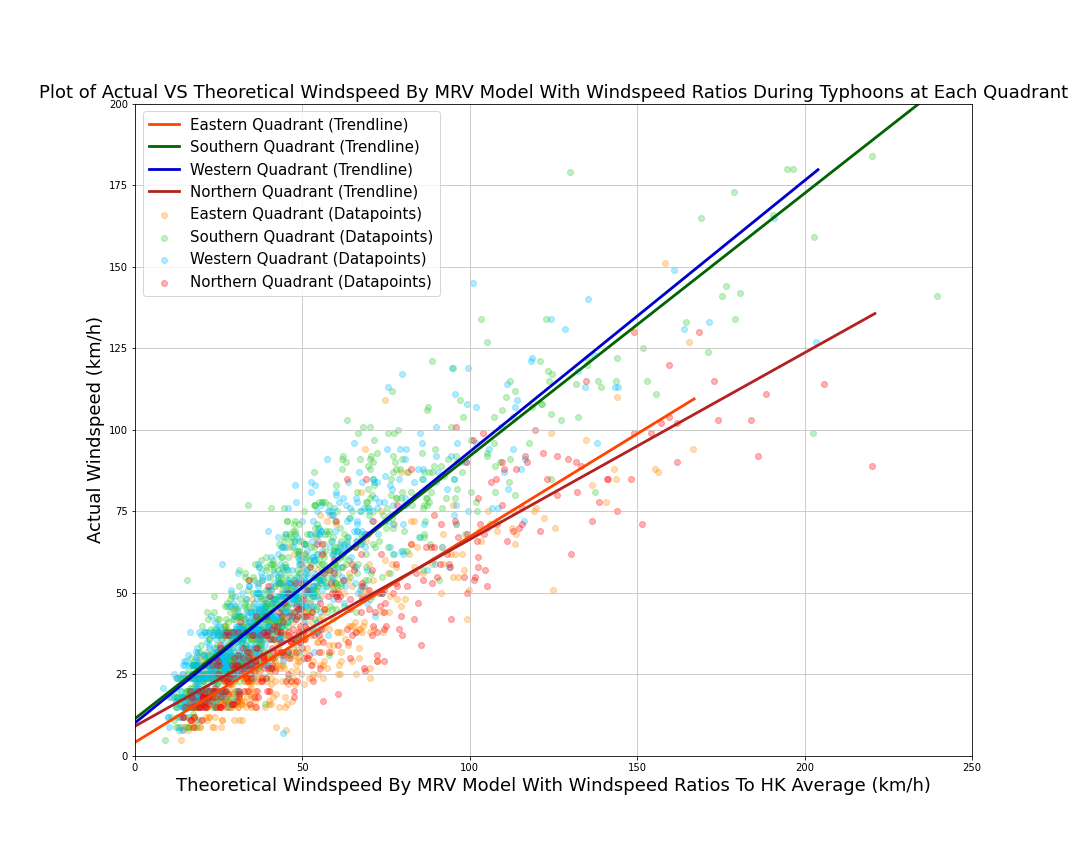

In [40]:
# Graph 9: Scatter Plot of Actual VS Theoretical Windspeeds By MRV Model With Windspeed Ratios To HK Average During Typhoons at Each Quadrant
Actual_VS_MRV_Theoretical_Windspeed_With_Ratios_Quadrants_Scatter_Plot = Image.open("Actual_VS_MRV_Theoretical_Windspeed_With_Ratios_Quadrants_Scatter_Plot.png")
display(Actual_VS_MRV_Theoretical_Windspeed_With_Ratios_Quadrants_Scatter_Plot)

Exploratory Data Analysis Part 9:
- Process:
    14. Calculate theoretical windspeeds under SLOSH Wind Model (Houston and Powell) with windspeed ratios to HK average
        - The second formula to calculate the theoretical windspeed: SLOSH Wind Model by Houston and Powell (1994):
            - $V = V_{max} \frac{2 R R_{max}}{(R^2 + R_{max}^2)}$
                - $V$: Windspeed at a given location
                - $V_{max}$: Intensity of the tropical cyclone
                - $R$: Distance between the tropical cyclone and the given location
                - $R_{max}$: Radius of maximum winds of the tropical cyclone
        - To consider for the differences in geographical surroundings between each windspeed station
        - Again make use of the windspeed ratios between each station to an average of all HK stations
        - Mutliply the theoretical windspeed under SLOSH Wind Model by the windspeed ratio for each of the stations
            - Every data point with different station and different TC have a difference theoretical windspeed
            - A theoretical windspeed catered to each station based on its vulnerability to typhoons in each quadrant
        - SLOSH Wind Model with windspeed ratios to HK average:
            - $V = k V_{max} \frac{2 R R_{max}}{(R^2 + R_{max}^2)}$
                - $k$: Windspeed ratio between the given location to average of the entire city
                - $V$: Windspeed at a given location
                - $V_{max}$: Intensity of the tropical cyclone
                - $R$: Distance between the tropical cyclone and the given location
                - $R_{max}$: Radius of maximum winds of the tropical cyclone
    15. Plot scatter plot of actual VS theoretical windspeeds by MRV model with windspeed ratios for each quadrant TC
        - See Graph 10 below
        - x Axis (Independent Variable): Theoretical windspeed by SLOSH Model with windspeed ratios to HK ave (km/h)
        - y Axis (Dependent Variable): Actual windspeed at every station (km/h)
        - Different colours represent typhoons located at different quadrants
            - Orange: Eastern Quadrant
            - Green: Southern Quadrant
            - Blue: Western Quadrant
            - Red: Northern Quadrant
        - Correlation coefficients:
            - Eastern Quadrant: 0.762
            - Southern Quadrant: 0.854
            - Western Quadrant: 0.783
            - Northern Quadrant: 0.867
            - Average of All Quadrants: 0.817
            - Very strong relationship
        - Trendline formulas:
            - Eastern Quadrant: y = 0.471x + 14.99
            - Southern Quadrant: y = 0.661x + 20.39
            - Western Quadrant: y = 0.641x + 21.97
            - Northern Quadrant: y = 0.488x + 13.45
            - Average of All Quadrants: y = 0.565x + 17.70
            - All positive slopes and positive y-intercepts
            - Southern and western quadrants again higher slope and y-intercept than northern and eastern quadrants
                - Supports hypothesis based on previous observations on difference in windspeeds between quadrants
            - Slopes much lower than MRV Model both with or without windspeed ratios, well below 1
                - Rate of change of theoretical windspeeds farther away from rate of change of actual windspeeds
                - Probably less accurate representation than MRV Model
            - y-Intercept farther above 0km/h than MRV Model both with or without windspeed ratios
                - Doesn't support the meteorological theory that the y-intercept should be 0km/h
                - Not as close to the meteorological theory than the MRV Model
        - Very clearly positive linearly correlated, strong correlation but weaker than MRV Model
            - Average correlation coefficient 0.075 lower than MRV Model with windspeed ratios
            - More horizontally scattered than the MRV Model with windspeed ratios
            - Probably not as good of a model as MRV Model with windspeed ratios
            - But still much better than without using windspeed ratios

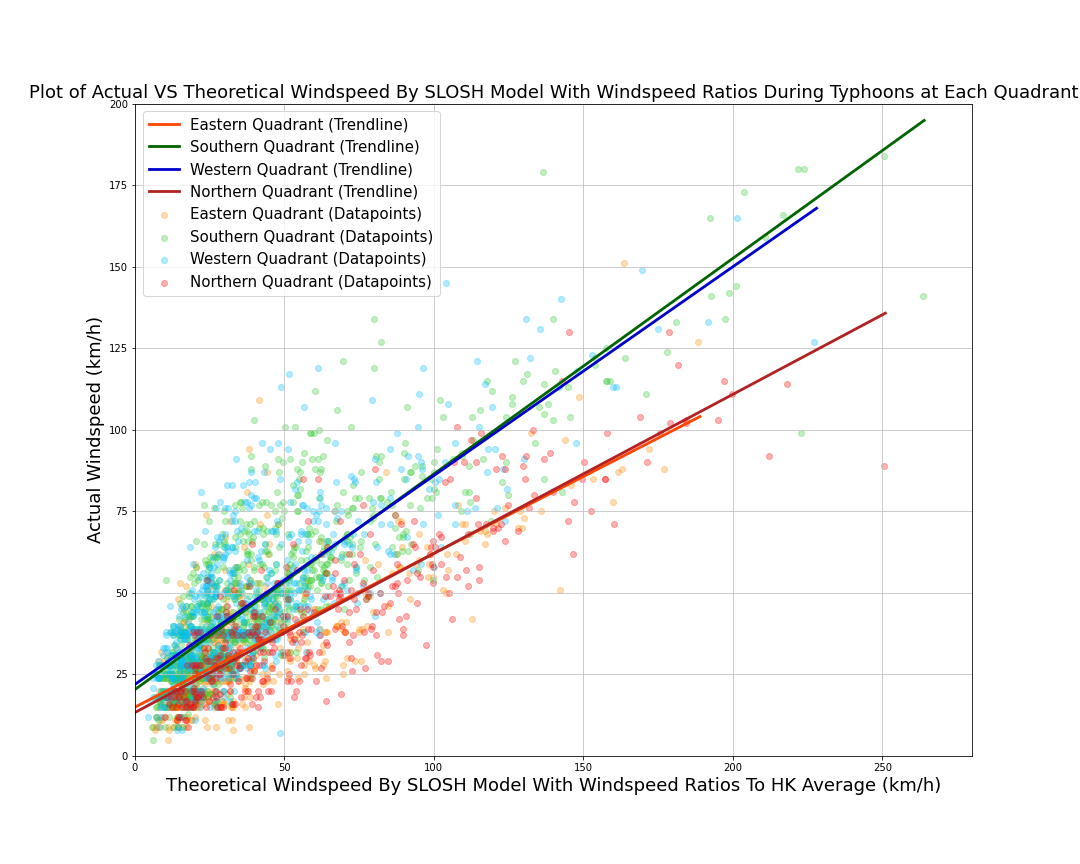

In [44]:
# Graph 10: Scatter Plot of Actual VS Theoretical Windspeeds By SLOSH Model With Windspeed Ratios To HK Average During Typhoons at Each Quadrant
Actual_VS_SLOSH_Theoretical_Windspeed_With_Ratios_Quadrants_Scatter_Plot = Image.open("Actual_VS_SLOSH_Theoretical_Windspeed_With_Ratios_Quadrants_Scatter_Plot.png")
display(Actual_VS_SLOSH_Theoretical_Windspeed_With_Ratios_Quadrants_Scatter_Plot)

Data Limitations:
- Size of data set
    - Data between 2001-2020 collected
        - Data before 2001 are not used due to lack of radius of max winds data in JTWC database before 2001
        - Too many missing data points for those windspeed stations built after 2001
        - Data collection too time consuming
    - Data set not long term enough
        - Unable to compare changes in windspeed through the years to find long term trend in windspeeds in Hong Kong
            - Such analysis can be done to discover how urbanization in Hong Kong affected windspeeds
        - On the other hand, a smaller time scale means I can eliminate the factor of urbanization from this project
            - Assume the year of the tropical cyclone does not affect the windspeeds by much
- Choosing between using closest point of approach (CPA) or point of highest windspeeds (PHW)
    - Generally prefer to use CPA because it is more easily obbtained from HKO database
    - But need to eliminate scenario of CPA not representative of conditions during TC's highest impact to Hong Kong
        - e.g. Tropical cyclone almost at dissipation by the point it reaches Hong Kong's CPA
            - In these cases, winds will be very weak by the point it reaches Hong Kong's CPA
            - Maximum winds occur well before the TC reaches Hong Kong's CPA when it was still intense
    - Criteria for disquishing between using CPA or PHW:
        - Use PHW if PHW more than 6 hours apart from CPA normally
        - Or more than 3 hours apart if CPA distance is less than 100km from Hong Kong
            - Much larger changes in windspeed when CPA distance is closer
    - These criteria are quite arbitrary
        - Without enough scientific basis on why I choose these criteria
        - Could lead to inconsistencies between different cases of TCs
            - Especially for the TCs whose CPA timing lies right near the boundary of the criteria
    - Inconsistencies in choosing between CPA or PHW affect later calculations of theoretical windspeeds
        - Affecting the CPA/PHW intensity, distance and R_max chosen, and thus the theoreetical windspeed
- Radius of maximum winds (R_max)
    - Radius of maximum winds used as a measure of size, but subject to a lot of uncertainties
        - R_max generally a very difficult parameter to measure without collecting data by flying into the typhoon
            - Hurricane hunters in the Atlantic Ocean can provide much better data for R_max
                - But hurricane hunters do not work in the Northwest Pacific Ocean anymore
                    - They stopped flying planes into Northwest Pacific Ocean typhoons since 1987
                - Only extremely few Northwest Pacific typhoons have flights flown inside them to get data
            - Windspeed stations data on land can also provide much better estimates for R_max
                - But defeats the purpose of forecasting if R_max data are only obtained after landfall
    - JTWC estimates radius of maximum winds only using models, without basis on actual recorded data
        - Unlike intensity which can be estimated using Dvorak Technique
        - There is no objective technique to accurately estimate R_max
        - There is likely a lot of unceratainty in JTWC's esimates of R_max
    - HKO's radar imagery likely provides a better estimate for R_max than JTWC
        - But still, the area of most intense rainband does not necessarily coincide with the area of highest winds
        - Still only an indirect measure for radius of maximum winds
    - Structural differneces between each tropical cyclone means that R_max does not always represent size well
        - Some tropical cyclones have a very small R_max but large circulation size
            - e.g. 2012 Vicente
                - Large circulation size but compact near its core
        - Some tropical cyclones have a very large R_max but relatively small circulation size
            - e.g. Most weaker tropical cyclones
                - Very loose and unstructured core but relatively small circulation size
        - Using R_max as representation for TC size in formulas calculating theoretical windspeed not always accurate
- Calculating 10-minute sustained windspeeds using conversion factor and 1-hour sustained windspeeds
    - Despite great effort spent in calculating conversion factors, still not necessarily accurate
        - 1-hour to 10-minute sustained windspeeds conversion factors vary
        - Conversions sometimes lead to big overestimates or underestimates of 10-minute sustained windspeeds
    - TCs with higher windspeeds usually have lower 1-hour to 10-minute sustained windspeeds conversion factors
        - As inferred by the fact that stations with higher average windspeeds have lower conversion factors
        - But only between windspeed station differences are considered for conversion, not between TC differences
            - Would be too complicated if both are taken into account
    - TCs with higher 1-hour sustained windspeeds might more often have their 10-min sustained windspeed overestimated
        - Conversion factors might be more catered to the larger number of lower windspeed TCs
        - Windspeed stations with existing 10-min sustained windspeeds might thus be more biased towards lower winds
            - They do not benefit from the overesimation of 10-min sustained windspeed for higher windspeed TCs
- Separating TCs according to their CPA bearing quadrant
    - Division of quadrants not completely accurate
        - e.g. Bearings of SW, WSW, W, WNW (213.75-303.75 degrees) belong to W quadrant, instead of 225-315 degrees
        - Bearings between 213.75-225 degrees theoretically are in southern quadrant, but placed into western quadrant
    - Distribution of bearings not equal within each quadrant
        - e.g. Much more typhoons located in SW and WSW bearings than W and WNW for western quadrant
            - This explains why both southern quadrant and western quadrant have E wind most dominant
                - Western quadrant should theoretically cause S wind according to the patterns of the other quadrants
                - But SW bearings dominates over W bearing, leading to more E winds than S winds

GitHub Repository: https://github.com/Luigi728/INFO_2950
- Please email me if you cannot access the Jupyter files within there
    - I don't have any previous experience of using GitHub, so I don't know what I'm doing...

Questions For Reviewers:
- Is my data description, data cleaning process and exploratory data analysis understandable for you?
    - I know that this project involves a lot of unfamiliar terminology and complex procedures for a layperson
    - I tried my best to explain this as clearly as possible, but not sure if it's good enough
        - I actually don't know if I'm explaining too little or explaining too much
- Judging by my description of everything I've done, do you think I have done a lot more than what other people do?
    - I have spent an approximated 30 hours on data collection, 25 hours on data cleaning
    - 15 hours on exploratory data analysis and around 10 hours on writing this Project Phase 2
        - Having to spend so much time might be party because of my stupidity in doing way too much stuff manually
            - There might probably be better ways for me to get that 102 csv files
                - e.g. By web scraping, which unfortunately is taught after I already almost complete data collection
        - But still, I'm pretty sure this is a very complicated project
    - Is around 80 hours spent on Phase 1-2 of this project enough to justify less work expected of me for Phase 3?
    - By the way if you haven't noticed, I'm working all this alone
        - I won't be able to find anyone else who wants to work on such a bizarre topic

Thank you for your patience of reading this super long Project Phase 2!